# made by Aryan rathore (cse core student at vit bhopal)
# email :- Aryanrathore13572002@gmail.com
# linkedin :- https://www.linkedin.com/in/aryan-rathore-b15459215/
# github :- https://github.com/aryanrathore1012

# ________________________________________________________________________________

 # objective 
 <b>predict if the news is fake or not. using several features</b>


# ________________________________________________________________________________
# Index
<b>

1. Imports
2. Preliminary, Exploratory Data analysis of train and test csv
3. what is TF-IDF - converting the text to integers so the models can understand them
4. why we are only using the author and title columns and not the text column
5. making the_big_one dataframe by combining the test and train csvs and then joinging the author and title column as content
6. data preprocessing - converting data into vectors using stemming and TF-IDF, then splitting the dataset into training and testing sets
7. fitting our data into diffrent types of classification models
8. model evaluation
9. further evaluation of the random forest model
</b>

________________________________________________________________________________
# 1. Imports


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

________________________________________________________________________________
# 2. Data analysis of train and test csv

In [3]:
# reading the csvs:

train_data = pd.read_csv("F://aryans_code_notes//machine_learning//fake_news_predictor//train.csv")
test_data = pd.read_csv("F://aryans_code_notes//machine_learning//fake_news_predictor//test.csv")

### A) checking if the train_data has:
0. first few values
1. general shape 
2. columns
3. data distribution
4. has any missing values
5. handling the missing values in train_data

In [4]:
# 0
train_data.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# 1. general shape 
train_data.shape

(20800, 5)

### The train_data is HUGE with 20,8000 rows

In [6]:
# 2. columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


the train_data DF has:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake (1 - Fake news), (0 - real News)

In [7]:
# 3. data distribution
train_data.describe(include=["object", "int64"])

,id,title,author,text,label
count,20800.000000,20242,18843,20761,20800.000000
unique,NaN,19803,4201,20386,NaN
top,NaN,Get Ready For Civil Unrest: Survey Finds That ...,Pam Key,,NaN
freq,NaN,5,243,75,NaN
mean,10399.500000,NaN,NaN,NaN,0.500625
std,6004.587135,NaN,NaN,NaN,0.500012
min,0.000000,NaN,NaN,NaN,0.000000
25%,5199.750000,NaN,NaN,NaN,0.000000
50%,10399.500000,NaN,NaN,NaN,1.000000
75%,15599.250000,NaN,NaN,NaN,1.000000


### the title, author, text columns seem to have missing values

In [8]:
# 4. has any missing values
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

### there are some string values missing in the dataset like title or author or text

### 5. handling the missing values in train_data

### there are no integer values missing in the data only string values so replacing missing values with 0 is useless
### we can replace the missing values with "" (empty string) instead of dropping whole rows which will do the trick

In [9]:
train_data = train_data.fillna("") # replacing replacing nan values with ""

In [10]:
train_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

### the training data is now ready for further explatory analysis and preoccessing
# ________________________________________________________________________________________

# B) cheking if test_data has:
0. first few values
1. general shape 
2. columns
3. data distribution
4. has any missing values
5. handling the missing values in test_data

In [11]:
# 0. first few values
test_data.head()

,Unnamed: 0,id,title,author,text,label
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [12]:
# 1. general shape 
test_data.shape

(5200, 6)

This csv is smaller than train csv but still huge with 5200 rows and 4 columns

In [13]:
# 2. columns
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5200 non-null   int64 
 1   id          5200 non-null   int64 
 2   title       5078 non-null   object
 3   author      4697 non-null   object
 4   text        5193 non-null   object
 5   label       5200 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 243.9+ KB


### the label column from the test dataset is missing, it is in the submit csv so i will join the labels by reading the submit csv
### the code bellow joins the labels from submit_csv to test_csv and writes the test_csv with labels so you dont have to

In [14]:
submit_data = pd.read_csv("F://aryans_code_notes//machine_learning//fake_news_predictor//submit.csv")
# test_data["label"] = submit_data["label"]
# submit_data.head()

In [15]:
# test_data.to_csv("F://aryans_code_notes//machine_learning//fake_news_predictor//test.csv")

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5200 non-null   int64 
 1   id          5200 non-null   int64 
 2   title       5078 non-null   object
 3   author      4697 non-null   object
 4   text        5193 non-null   object
 5   label       5200 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 243.9+ KB


the test_data DF has:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake (1 - Fake news), (0 - real News)

In [17]:
# 3. data distribution
test_data.describe(include=["object","int64"])

,Unnamed: 0,id,title,author,text,label
count,5200.000000,5200.000000,5078,4697,5193,5200.000000
unique,NaN,NaN,5056,1732,5126,NaN
top,NaN,NaN,Get Ready For Civil Unrest: Survey Finds That ...,Pam Key,,NaN
freq,NaN,NaN,2,65,31,NaN
mean,2599.500000,23399.500000,NaN,NaN,NaN,0.550192
std,1501.255031,1501.255031,NaN,NaN,NaN,0.497522
min,0.000000,20800.000000,NaN,NaN,NaN,0.000000
25%,1299.750000,22099.750000,NaN,NaN,NaN,0.000000
50%,2599.500000,23399.500000,NaN,NaN,NaN,1.000000
75%,3899.250000,24699.250000,NaN,NaN,NaN,1.000000


### there are some values missing in the test data as well in the title, author, and text columns

In [18]:
# 4. has any missing values

test_data.isnull().sum()

Unnamed: 0      0
id              0
title         122
author        503
text            7
label           0
dtype: int64

### like train_data the test_Data has some string type missing values in the title, author, and text columns so we will relace these values with "" (empty string)

In [19]:
# 5. handling the missing values in test_data
test_data = test_data.fillna("")

In [20]:
test_data.isnull().sum()

Unnamed: 0    0
id            0
title         0
author        0
text          0
label         0
dtype: int64


### the data is not integer so visualisation is out of the game, we can make word clouds but the most common words are the ones we will ignore so that is out of the option too. therefore there is no need for further Preliminary, Exploratory Data analysis of train and test csv

# this concludes the Preliminary, Exploratory Data analysis of train and test csv
# _______________________________________________________________________________________________________________________

# 3. what is TF-IDF - converting the text to integers so the models can understand them

### the data we are reciving are sentances not numbers, the models cannot understand these sentances and words so we will have to convert these sentances into numbers using the TF-IDF algorithm and stemming

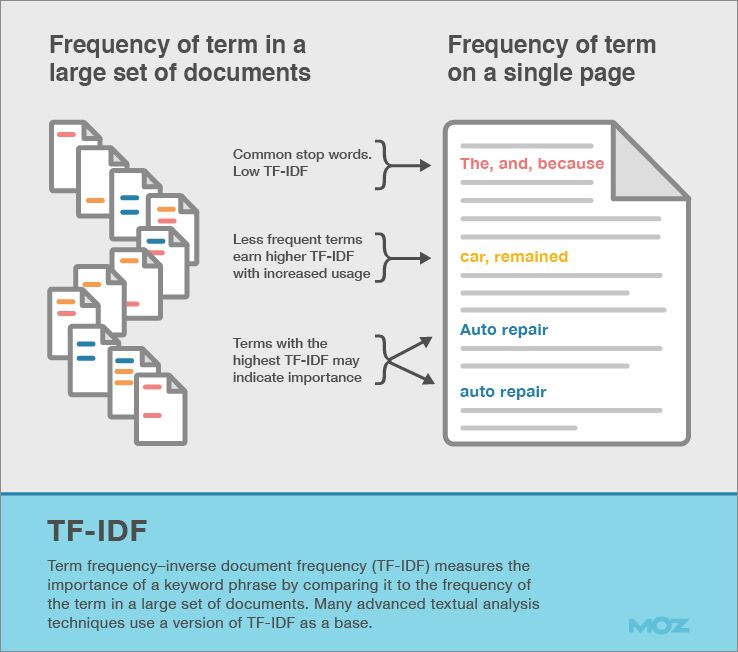

In [21]:


%matplotlib inline
from IPython.display import Image
Image('F://aryans_code_notes//machine_learning//fake_news_predictor//how_td_idf_works.jpg')



### the formula for the algorithm as follows

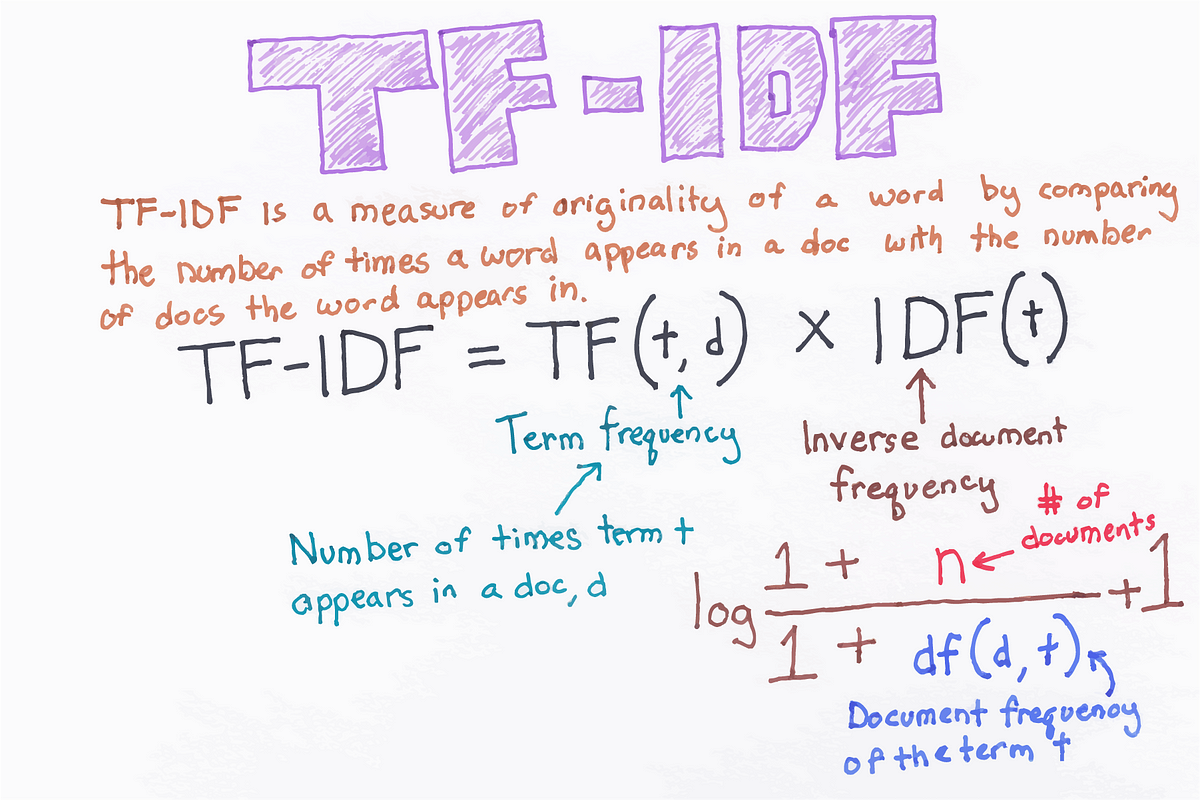

In [22]:
Image('F://aryans_code_notes//machine_learning//fake_news_predictor//TD_IDF_formula.png')

# _________________________________________________________________________________

# 4. why we are only using the author and title columns and not the text column

### 1. the text column has whole paragrahs and essays of words which will take too much time to process
### 2. in news the title of the content is everything as the title is what attracts people to read the news article in the first place you can think of the title as a short one line summary of the whole article which is more than enough for our models to predict if they are fake or not
### 3. therefor we will make a content columns which is the combination of the author and title column
### 4. we will convert this content into integers and feed it to the models


# ____________________________________________________________________________________________

# 5. making the_big_one dataframe by combining the test and train csvs and then joinging the author and title column as content

In [23]:
# test_data = test_data.drop(columns="Unnamed: 0")
the_big_one = pd.concat([train_data, test_data], axis=0).drop(columns="id")
the_big_one

,title,author,text,label,Unnamed: 0
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,NaN
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,NaN
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,NaN
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,NaN
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,NaN
...,...,...,...,...,...
5195,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,0,5195.0
5196,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1,5196.0
5197,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,0,5197.0
5198,300 US Marines To Be Deployed To Russian Borde...,,« Previous - Next » 300 US Marines To Be Deplo...,1,5198.0


In [24]:
the_big_one["content"] = the_big_one["author"] + " " + the_big_one["title"]
the_big_one = the_big_one.drop(columns=["text","title","author"])
the_big_one

,label,Unnamed: 0,content
0,1,NaN,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,NaN,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,NaN,Consortiumnews.com Why the Truth Might Get You...
3,1,NaN,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,NaN,Howard Portnoy Iranian woman jailed for fictio...
...,...,...,...
5195,0,5195.0,Jody Rosen The Bangladeshi Traffic Jam That Ne...
5196,1,5196.0,Sheryl Gay Stolberg John Kasich Signs One Abor...
5197,0,5197.0,"Mike McPhate California Today: What, Exactly, ..."
5198,1,5198.0,300 US Marines To Be Deployed To Russian Bord...


### what is stemming and why are using it?
### Stemming is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems. For example, the stem of the words eating, eats, eaten is eat. Search engines use stemming for indexing the words.

In [25]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

These are all stopwords they are useless and wont add much to the meaning of the sentance so we will remove them from the content

In [26]:
port_stem = PorterStemmer()

def stemming(sentance):
    stemmed_sentance = re.sub("[^a-zA-Z]", " ", sentance).lower().split()
    stemmed_sentance = [port_stem.stem(word) for word in stemmed_sentance if not word in stopwords.words('english')]
    stemmed_sentance = " ".join(stemmed_sentance)
    return stemmed_sentance

# this is what the second line of the function does
# for word in stemmed_sentance:
    # if word not in stopwords.words("english"):
        # word = port_stem.stem(word)

### the code above stems a word to the root word like acting, acted -> act, now we will apply this function all values of the content

In [27]:
the_big_one["content"] = the_big_one["content"].apply(stemming)

as we can see it took 1 min 30.7s to proccess the whole df. imagine if we included text of the news as well it would take a big chunk of time to proccess that data

In [28]:
the_big_one

,label,Unnamed: 0,content
0,1,NaN,darrel lucu hous dem aid even see comey letter...
1,0,NaN,daniel j flynn flynn hillari clinton big woman...
2,1,NaN,consortiumnew com truth might get fire
3,1,NaN,jessica purkiss civilian kill singl us airstri...
4,1,NaN,howard portnoy iranian woman jail fiction unpu...
...,...,...,...
5195,0,5195.0,jodi rosen bangladeshi traffic jam never end n...
5196,1,5196.0,sheryl gay stolberg john kasich sign one abort...
5197,0,5197.0,mike mcphate california today exactli sushi ne...
5198,1,5198.0,us marin deploy russian border norway


# __________________________________________________________________________________________________________________________
# 6. data preprocessing - converting data into vectors using stemming and TF-IDF, then splitting the dataset into training and testing sets

### now that we have reduced our sentance as much as we can using stemming it is time to transform this data into a vector using TF-IDF

In [29]:
x = the_big_one["content"].values
y = the_big_one["label"].values

vectorizer = TfidfVectorizer()
vectorizer.fit(x)

x = vectorizer.transform(x)

# for some reason you cannot save these values back in the the_big_one["content"]
# vectorizer takes a list and returns a sparse matrix nupy.float64


In [30]:
# now lets see the x and y

# x is the transformed version of the_big_one["content"] which is the stemmed version of content + author
# x is the independent variable
print(x) 

  (0, 17288)	0.2781166125472449
  (0, 14828)	0.25354922096224614
  (0, 9798)	0.3693871882860092
  (0, 9497)	0.290825608206731
  (0, 8465)	0.24935613493111794
  (0, 7716)	0.21726269299124773
  (0, 5460)	0.23257096486999831
  (0, 4153)	0.26978240443495427
  (0, 3947)	0.36572148274252403
  (0, 3250)	0.2422331119224367
  (0, 2716)	0.3693871882860092
  (0, 292)	0.2687157895589713
  (1, 18506)	0.302866130276713
  (1, 7506)	0.1909783988504311
  (1, 6041)	0.7148288693257809
  (1, 3913)	0.2637495226080166
  (1, 3085)	0.19140110904389093
  (1, 2427)	0.3785747505554428
  (1, 2063)	0.15482456635576514
  (1, 1635)	0.2955188023757639
  (2, 17205)	0.4172932979023739
  (2, 10596)	0.4947014614528309
  (2, 6567)	0.34955443497637173
  (2, 5911)	0.38560410675769785
  (2, 3405)	0.4582385107661265
  :	:
  (25996, 1658)	0.2021989275099727
  (25996, 49)	0.26816989527303947
  (25997, 18716)	0.11993266522444608
  (25997, 16897)	0.34050601125337576
  (25997, 16848)	0.11760214491229513
  (25997, 16321)	0.52219741

In [31]:
print(y) # y is the_big_one["label"] column this is our dependent variable and the one we need to predict

[1 0 1 ... 0 1 0]


### x is our independent variable which is the combined version of title and author of the news
### y is our dependent variable which is the label we need to predict 
### since y is either 0 or 1 (fake or real news) this is a binary classification problem so we will use classification models

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(20800, 18866) (5200, 18866)
(20800,) (5200,)


# ______________________________________________________________________________________________________

# 7. fitting our data into diffrent types of classification models

In [51]:
adaboost = AdaBoostClassifier().fit(X_train, Y_train)
descision_tree_default = DecisionTreeClassifier().fit(X_train, Y_train)
descision_tree_5 = DecisionTreeClassifier(max_depth=5).fit(X_train, Y_train)
descision_tree_10 = DecisionTreeClassifier(max_depth=10).fit(X_train, Y_train)
knn = KNeighborsClassifier(3).fit(X_train, Y_train)
clf=RandomForestClassifier(n_jobs=2, random_state=1).fit(X_train, Y_train)
naive_bayes = MultinomialNB().fit(X_train, Y_train)
logistic_regression = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, Y_train)


# _____________________________________________________________________________________________________
# 8. model evaluation

### first we will check the training scores of the models to see if they are overfitting or not

In [52]:
model_list = [adaboost , descision_tree_default, descision_tree_5, descision_tree_10, knn, clf, naive_bayes, logistic_regression]

training_scores = []
testing_scores = []

for model in model_list:
    training_scores.append(model.score(X_train, Y_train))
    testing_scores.append(model.score(X_test, Y_test))

print(training_scores)
print(testing_scores)

[0.9044230769230769, 0.9977403846153846, 0.888125, 0.9041346153846154, 0.598173076923077, 0.9977403846153846, 0.9167307692307692, 0.8238942307692307]
[0.8973076923076924, 0.8776923076923077, 0.8807692307692307, 0.8915384615384615, 0.5355769230769231, 0.9171153846153847, 0.885, 0.8175]


In [56]:
model_list = [str(model) for model in model_list]

scores_df = pd.DataFrame({"model_names":model_list, "training_scores":training_scores, "testing_scores":testing_scores})
scores_df

,model_names,training_scores,testing_scores
0,AdaBoostClassifier(),0.904423,0.897308
1,DecisionTreeClassifier(),0.997740,0.877692
2,DecisionTreeClassifier(max_depth=5),0.888125,0.880769
3,DecisionTreeClassifier(max_depth=10),0.904135,0.891538
4,KNeighborsClassifier(n_neighbors=3),0.598173,0.535577
5,"RandomForestClassifier(n_jobs=2, random_state=1)",0.997740,0.917115
6,MultinomialNB(),0.916731,0.885000
7,"LogisticRegression(C=0.01, solver='liblinear')",0.823894,0.817500


In [59]:
scores_df.sort_values("testing_scores", ascending=False)

,model_names,training_scores,testing_scores
5,"RandomForestClassifier(n_jobs=2, random_state=1)",0.997740,0.917115
0,AdaBoostClassifier(),0.904423,0.897308
3,DecisionTreeClassifier(max_depth=10),0.904135,0.891538
6,MultinomialNB(),0.916731,0.885000
2,DecisionTreeClassifier(max_depth=5),0.888125,0.880769
1,DecisionTreeClassifier(),0.997740,0.877692
7,"LogisticRegression(C=0.01, solver='liblinear')",0.823894,0.817500
4,KNeighborsClassifier(n_neighbors=3),0.598173,0.535577


### ploting the training and testing scores 

Text(0.5, 1.0, 'graph of testing scores')

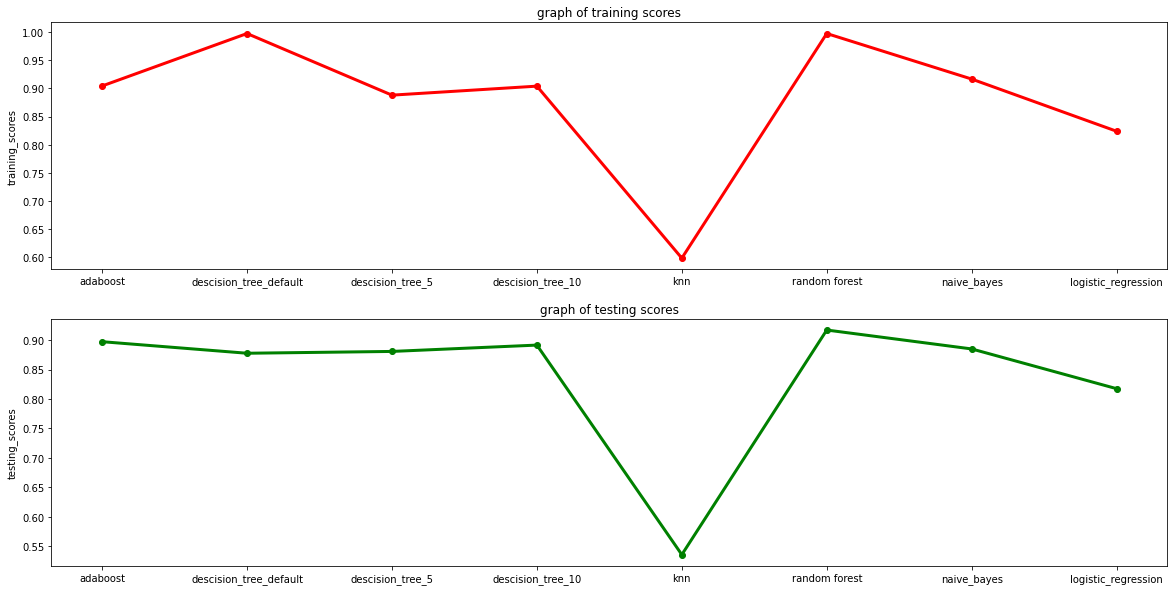

In [68]:
labels_list = ["adaboost" , "descision_tree_default", "descision_tree_5", "descision_tree_10", "knn", "random forest", "naive_bayes", "logistic_regression"]

fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1)

fig.set_figheight(10)
fig.set_figwidth(20)

ax1.plot(labels_list, training_scores, "o-r",linewidth=3)
ax1.set_ylabel("training_scores")
ax1.set_title("graph of training scores")

ax2.plot(labels_list, testing_scores, "o-g", linewidth=3)
ax2.set_ylabel("testing_scores")
ax2.set_title("graph of testing scores")



### the descision tree default model has seemed to overfit our data while all the other models have done preety well
### the random forest model has performed the best among the models with a training r2 score of 0.99 nad testing r2 score of 0.91 

# __________________________________________________________________________________________________
# 9. further evaluation of the random forest model

In [77]:
# printing the classification report
random_forest_prediction = clf.predict(X_test)

print(metrics.classification_report(Y_test, random_forest_prediction, target_names=['real news','fake news']))

              precision    recall  f1-score   support

   real news       0.92      0.92      0.92      2611
   fake news       0.92      0.92      0.92      2589

    accuracy                           0.92      5200
   macro avg       0.92      0.92      0.92      5200
weighted avg       0.92      0.92      0.92      5200



In [76]:

random_forest_prediction = clf.predict(X_test)

# creating a confusion matrix for the random forest classifier
cm=metrics.confusion_matrix(random_forest_prediction, Y_test)
print(cm)

[[2395  215]
 [ 216 2374]]


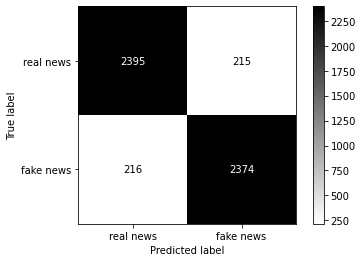

In [80]:
# creating a confusion matrix plot
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['real news','fake news'])
disp.plot(cmap="binary")

### our model has a precision, recall, f1 score of 0.92 which is preety good but there is still a small chunk of news it predicts wrong
### we are going to use this model to train our data in the main.py
### writing the_big_one with transformed values to our folder

# ______________________________________________________________________________________________________________

# made by Aryan rathore (cse core student at vit bhopal)
# email :- Aryanrathore13572002@gmail.com
# linkedin :- https://www.linkedin.com/in/aryan-rathore-b15459215/
# github :- https://github.com/aryanrathore1012

# ______________________________________________________________________________________________________________